Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

inside_df = pd.read_csv('inside-original.csv')
outside_df = pd.read_csv('outside-original.csv')

inside_df.head()
#outside_df.head()

,time,PM10_Standard,PM25_Standard,PM100_Standard,PM10_Enviornment,PM25_Enviornment,PM100_Enviornment,Particles_03um,Particles_05um,Particles_10um,Particles_25um,Particles_50um,Particles_100um,Tempurature,Relative_Humidity,Pressure,Altitude,Gas
0,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,312.0,90.0,4.0,1.0,0.0,0.0,33.391914,100.000000,766.566308,2292.229678,20138.0
1,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,312.0,90.0,4.0,1.0,0.0,0.0,24.359492,31.556823,1009.218609,33.618283,2422.0
2,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.396211,31.491426,1009.219441,33.611333,3639.0
3,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.438008,31.409351,1009.226420,33.553034,4692.0
4,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.476484,31.298463,1009.228169,33.538433,6017.0


In [2]:
outside_df = outside_df[outside_df['time'] > outside_df['time'].min() + 30]

outside_df.reset_index(drop=True, inplace=True)

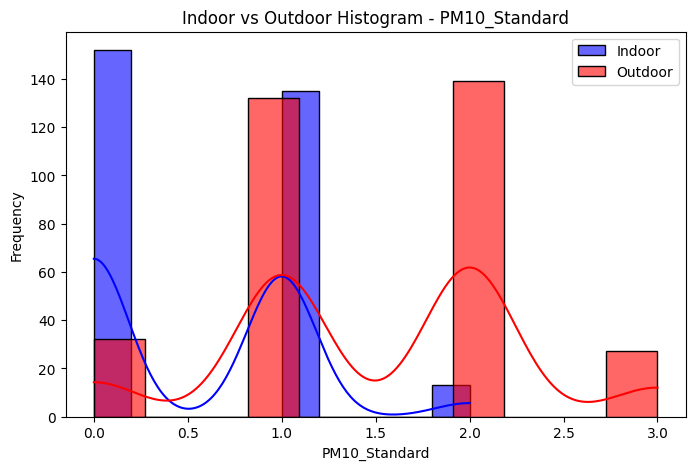

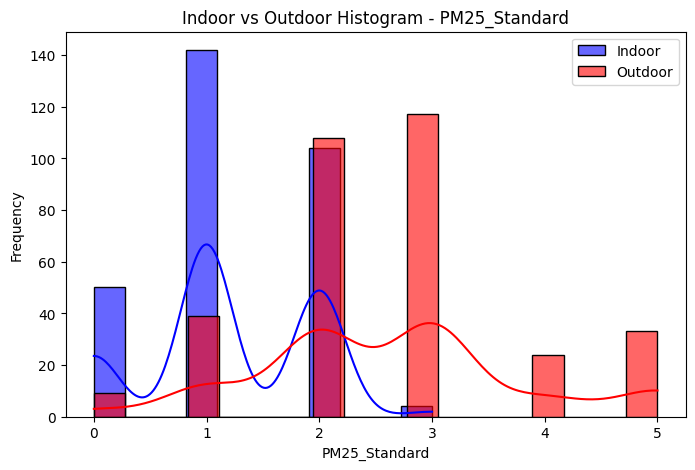

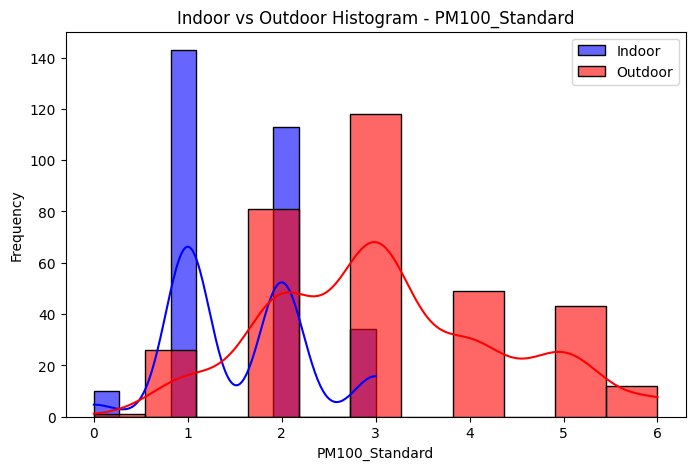

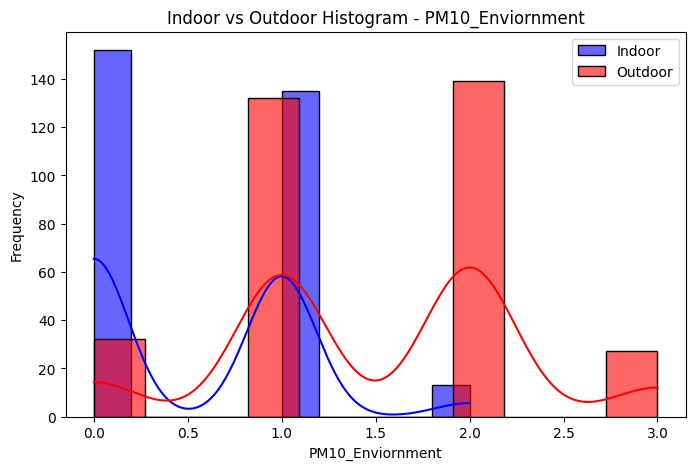

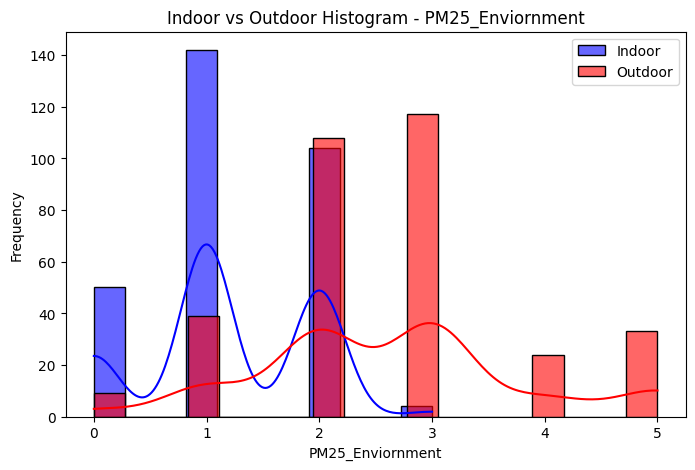

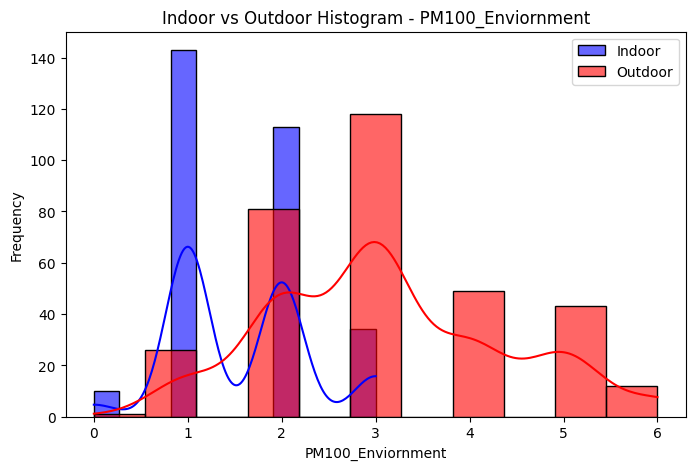

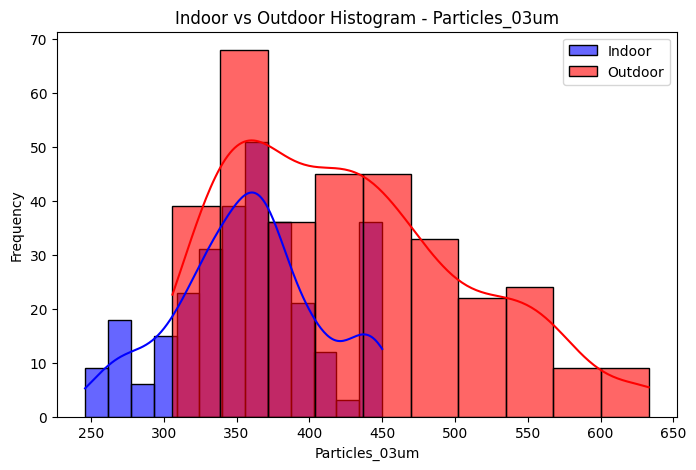

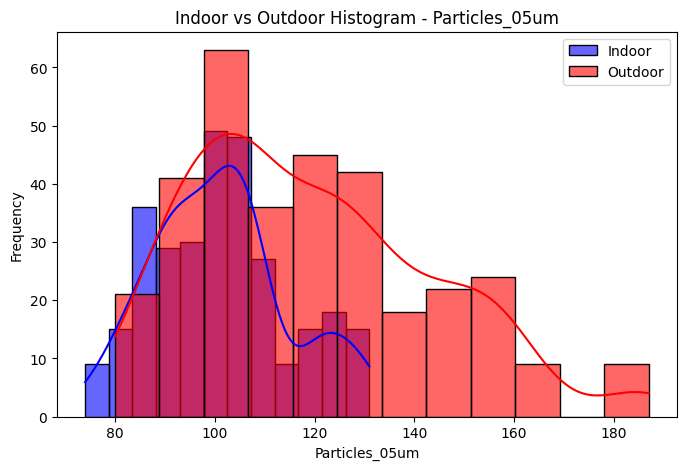

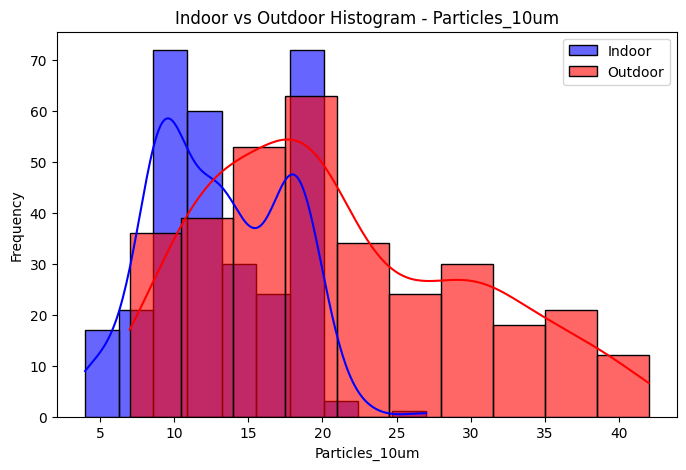

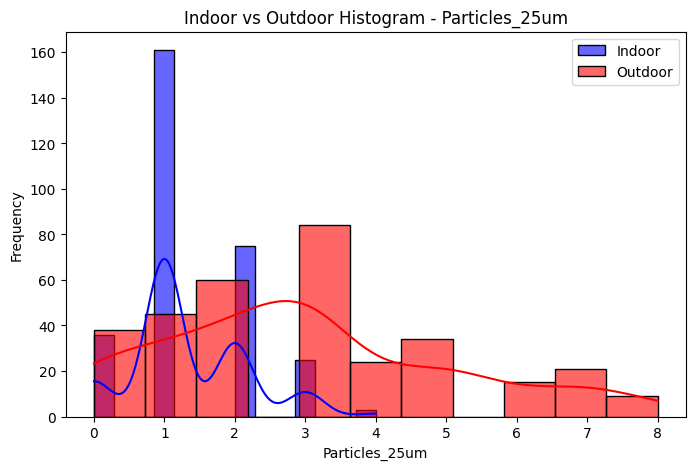

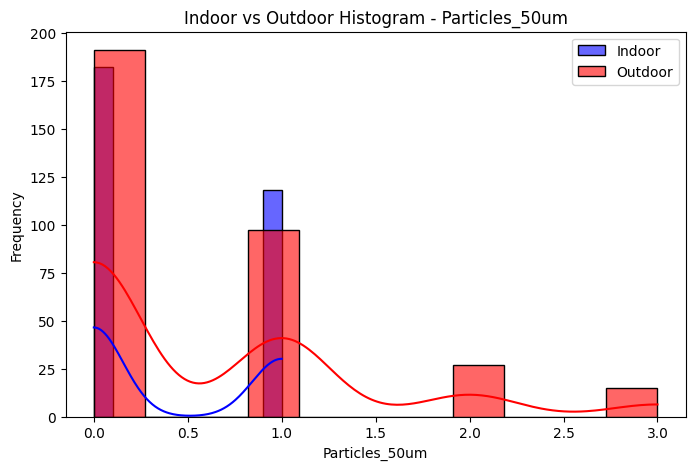

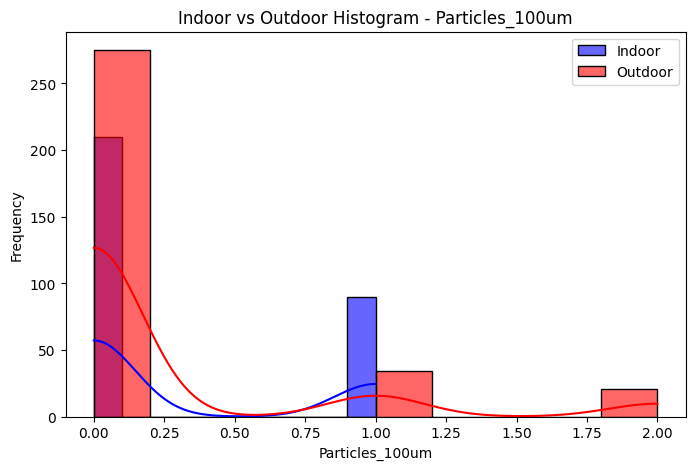

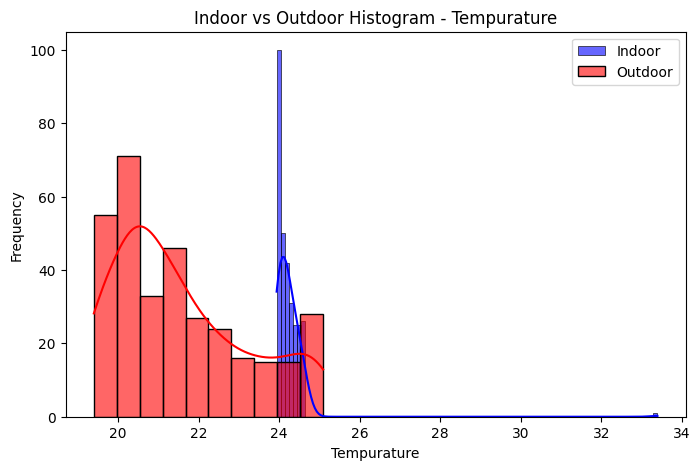

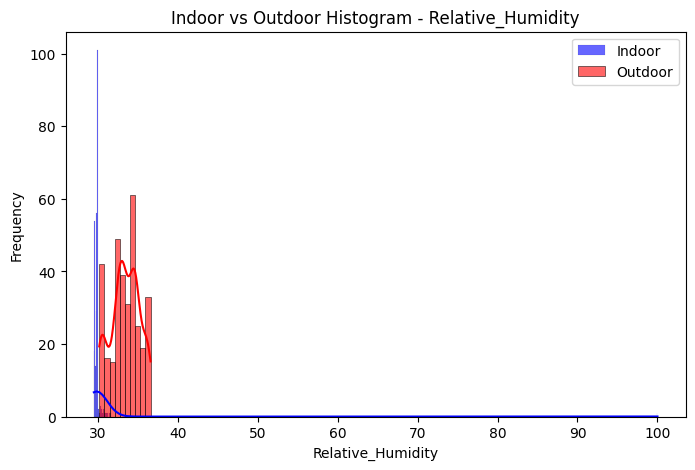

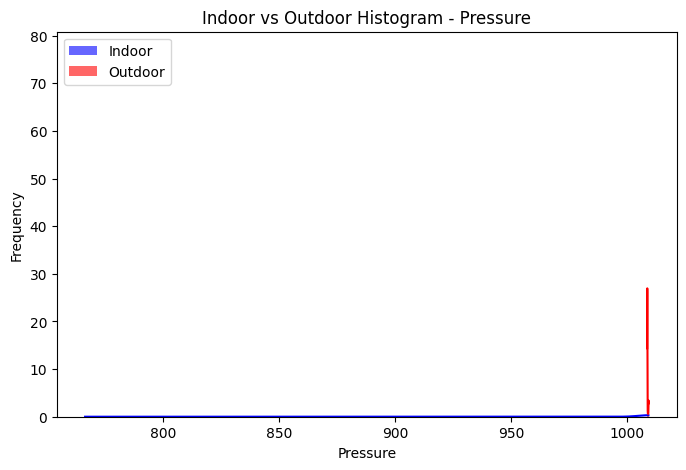

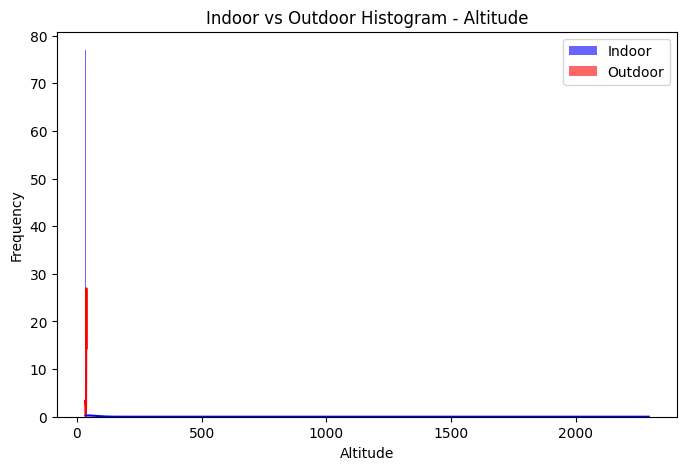

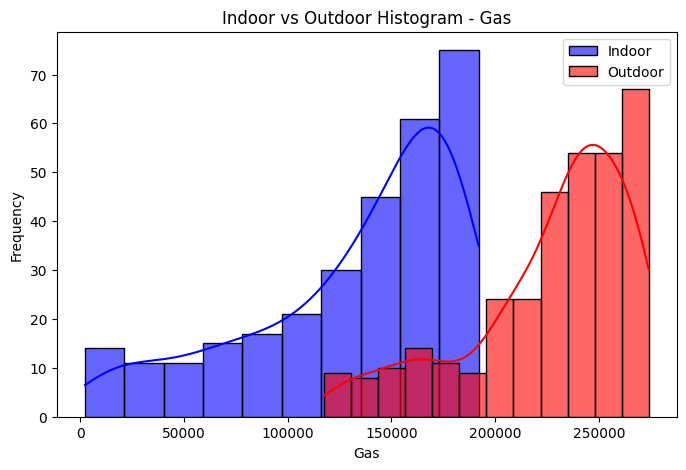

In [3]:
columns_to_plot = [col for col in inside_df.columns if col != 'time']

# Plot histograms
for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    sns.histplot(inside_df[col], label='Indoor', kde=True, alpha=0.6, color='blue')
    sns.histplot(outside_df[col], label='Outdoor', kde=True, alpha=0.6, color='red')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Indoor vs Outdoor Histogram - {col}')
    plt.show()

In [4]:
stats_df = pd.DataFrame({
    "Mean (Indoor)": inside_df.mean(),
    "Mean (Outdoor)": outside_df.mean(),
    "Std (Indoor)": inside_df.std(),
    "Std (Outdoor)": outside_df.std(),
})

stats_df

,Mean (Indoor),Mean (Outdoor),Std (Indoor),Std (Outdoor)
time,1.741391e+09,1.741393e+09,87.873697,98.069958
PM10_Standard,5.366667e-01,1.487879e+00,0.580038,0.780561
PM25_Standard,1.206667e+00,2.627273e+00,0.725057,1.176201
PM100_Standard,1.570000e+00,3.106061e+00,0.735006,1.256337
PM10_Enviornment,5.366667e-01,1.487879e+00,0.580038,0.780561
PM25_Enviornment,1.206667e+00,2.627273e+00,0.725057,1.176201
PM100_Enviornment,1.570000e+00,3.106061e+00,0.735006,1.256337
Particles_03um,3.569400e+02,4.280636e+02,49.342599,81.240078
Particles_05um,1.010867e+02,1.195909e+02,13.513247,24.358004
Particles_10um,1.302667e+01,2.100909e+01,4.445052,8.789842


In [5]:
N_inside = len(inside_df)
N_outside = len(outside_df)

stats_df["Mean Uncertainty (Indoor)"] = stats_df["Std (Indoor)"] / np.sqrt(N_inside)
stats_df["Mean Uncertainty (Outdoor)"] = stats_df["Std (Outdoor)"] / np.sqrt(N_outside)

stats_df["Separation (in std)"] = (stats_df["Mean (Indoor)"] - stats_df["Mean (Outdoor)"]) / stats_df["Std (Indoor)"]

In [6]:
stats_df

,Mean (Indoor),Mean (Outdoor),Std (Indoor),Std (Outdoor),Mean Uncertainty (Indoor),Mean Uncertainty (Outdoor),Separation (in std)
time,1.741391e+09,1.741393e+09,87.873697,98.069958,5.073390,5.398573,-21.045738
PM10_Standard,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Standard,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Standard,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
PM10_Enviornment,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Enviornment,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Enviornment,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
Particles_03um,3.569400e+02,4.280636e+02,49.342599,81.240078,2.848796,4.472119,-1.441425
Particles_05um,1.010867e+02,1.195909e+02,13.513247,24.358004,0.780188,1.340864,-1.369341
Particles_10um,1.302667e+01,2.100909e+01,4.445052,8.789842,0.256635,0.483865,-1.795800


 The distributions were well described by a Gaussian curve because our dataset was large enough.


Step 2

In [7]:
inside_compare = pd.read_excel('inside-compare.xlsx', header = 1)
outside_compare = pd.read_excel('outside-compare.xlsx', header = 1)

In [8]:
inside_compare

,Current Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),PM1.0 (standard),PM2.5 (standard),PM10 (standard),PM1.0 (env),PM2.5 (env),PM10 (env),Particles >0.3um,Particles >0.5um,Particles >1.0um,Particles >2.5um,Particles >5.0um,Particles >10um
0,2025-02-21 16:47:00,34.126875,29436,100.000000,702.802141,2981.268160,1,1,1,1,1,1,390,101,9,0,0,0
1,2025-02-21 16:47:01,23.311641,13676,39.066702,1009.757102,29.121433,1,1,1,1,1,1,390,101,9,0,0,0
2,2025-02-21 16:47:02,23.319844,25747,39.009050,1009.772505,28.992833,1,1,1,1,1,1,390,101,9,0,0,0
3,2025-02-21 16:47:03,23.320430,38003,38.927240,1009.790697,28.840951,1,1,2,1,1,2,396,103,12,1,1,0
4,2025-02-21 16:47:04,23.327461,49055,38.857826,1009.802425,28.743042,1,1,2,1,1,2,396,103,12,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2025-02-21 16:51:57,23.991523,175577,36.257617,1009.869312,28.184634,2,4,4,2,4,4,507,142,32,3,1,0
346,2025-02-21 16:51:58,23.996016,175209,36.235049,1009.864737,28.222832,2,4,4,2,4,4,507,142,32,3,1,0
347,2025-02-21 16:51:58,23.989961,175209,36.234453,1009.863261,28.235147,2,4,4,2,4,4,507,142,32,3,1,0
348,2025-02-21 16:51:59,23.994062,175945,36.234857,1009.852865,28.321941,2,4,4,2,4,4,531,145,31,3,1,0


In [9]:
outside_compare["Current Time"] = pd.to_datetime(outside_compare["Current Time"])

outside_compare = outside_compare[outside_compare["Current Time"] > outside_compare["Current Time"].min() + pd.Timedelta(seconds=30)]

outside_compare.reset_index(drop=True, inplace=True)

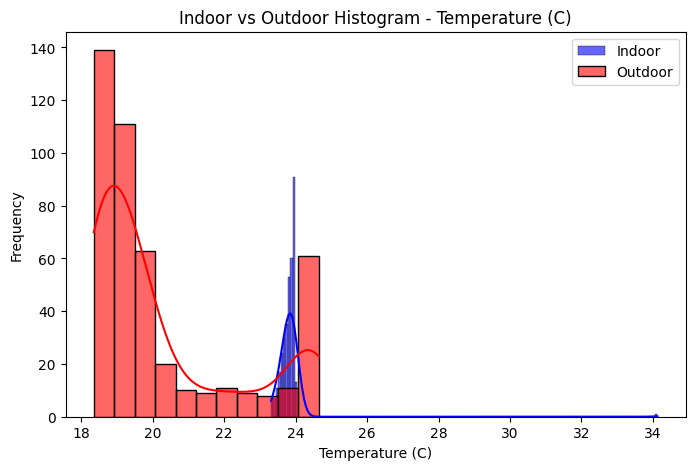

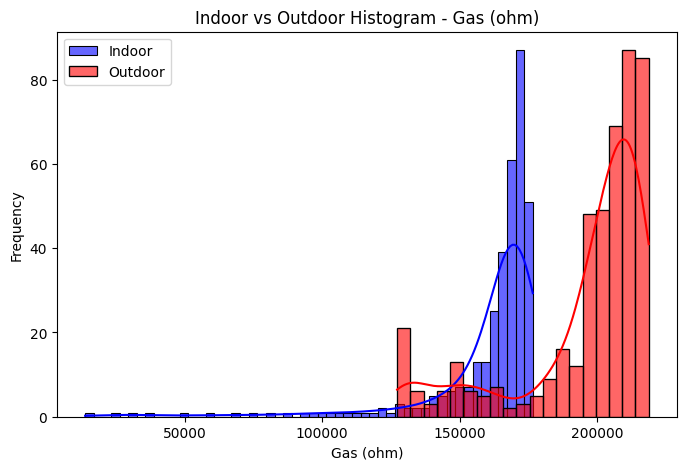

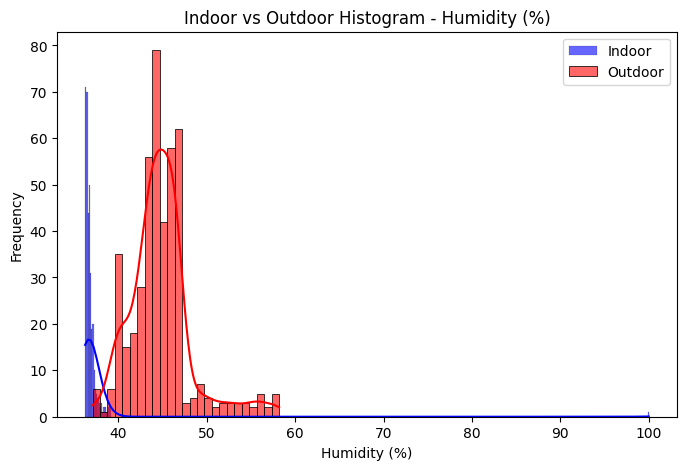

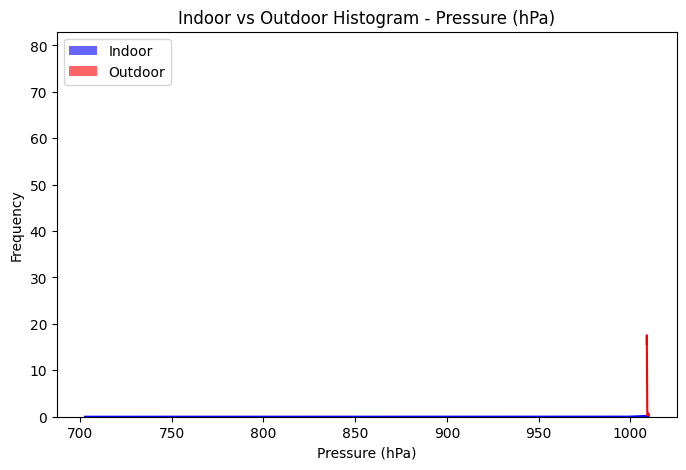

/Users/mihirgaudani/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


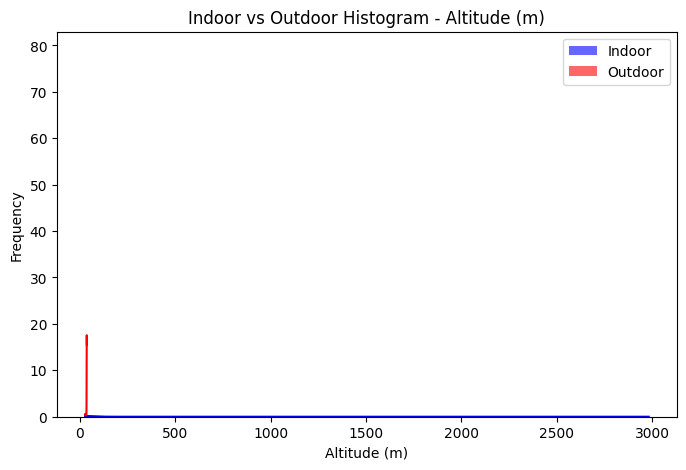

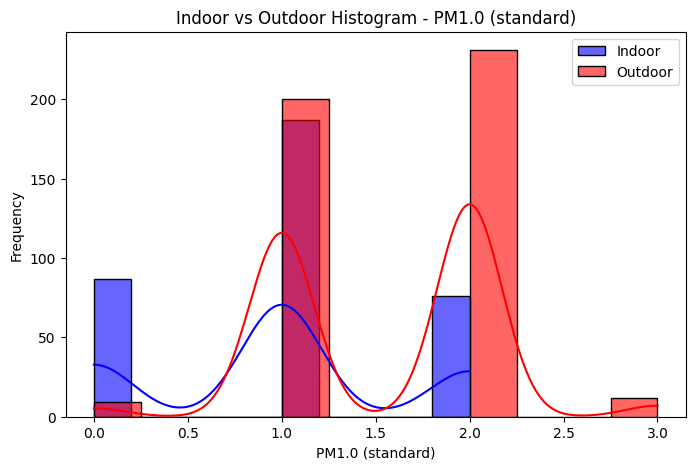

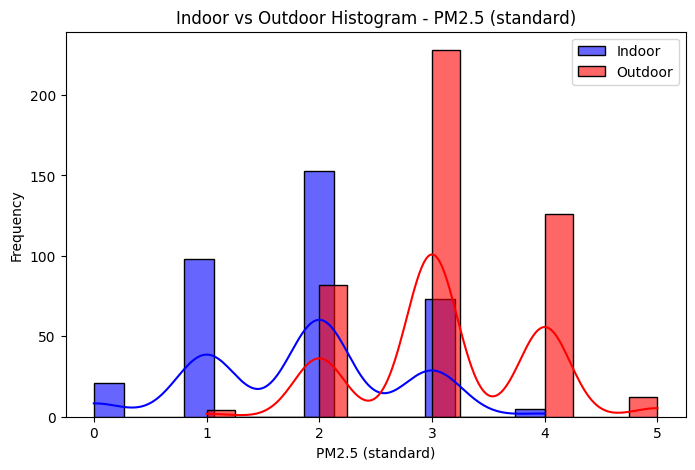

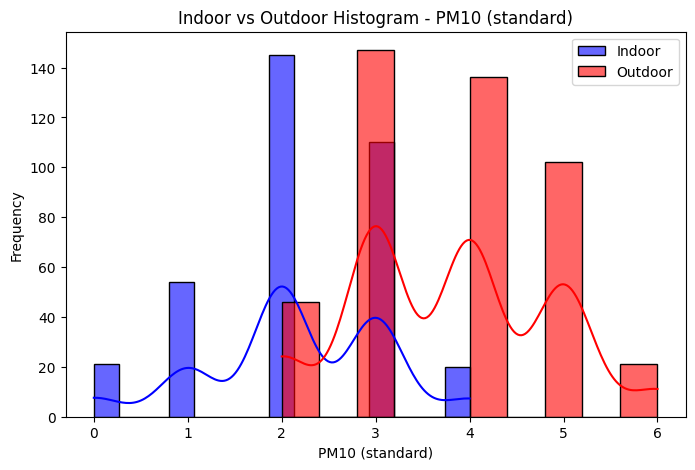

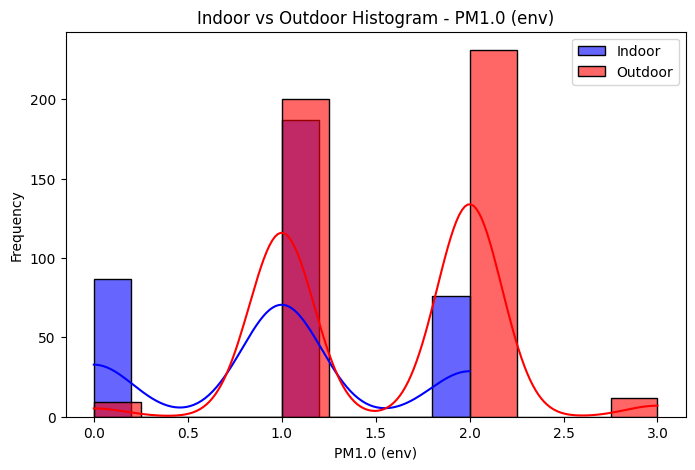

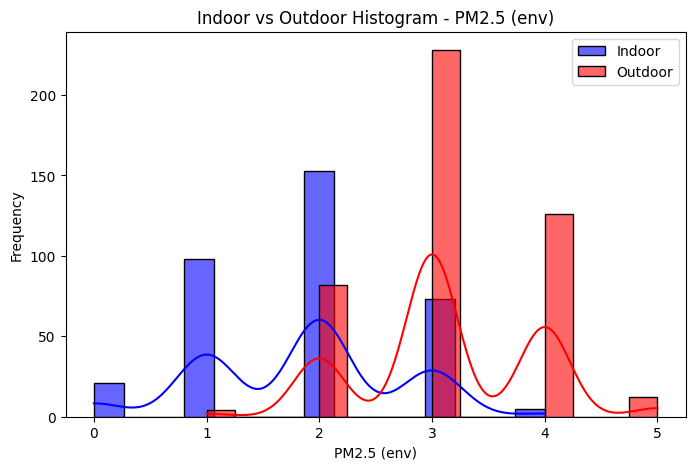

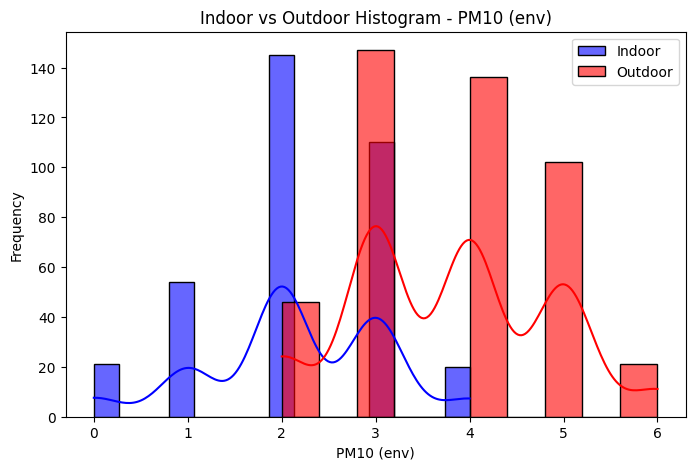

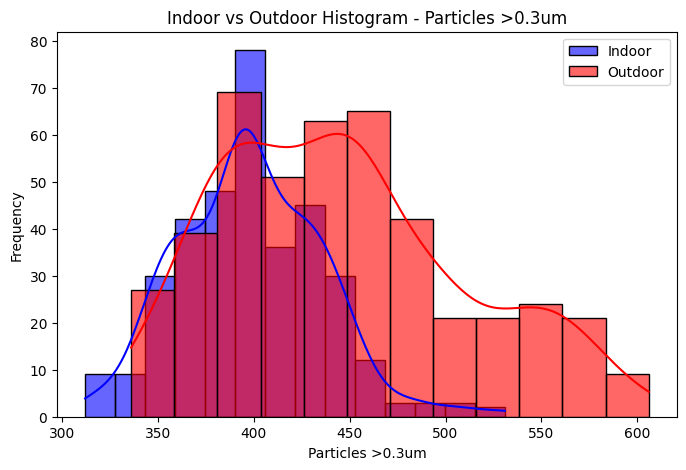

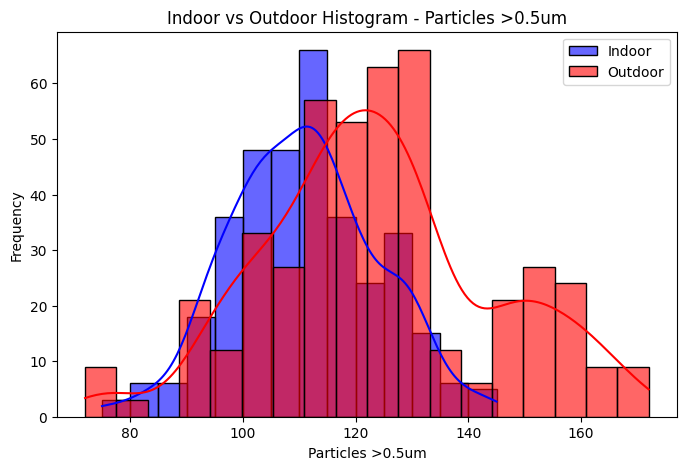

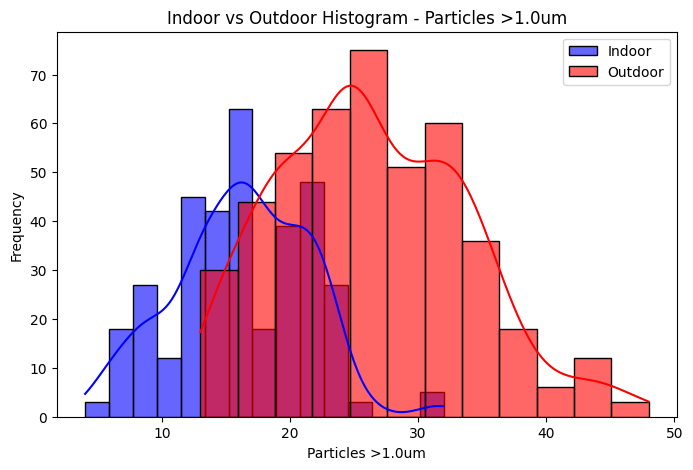

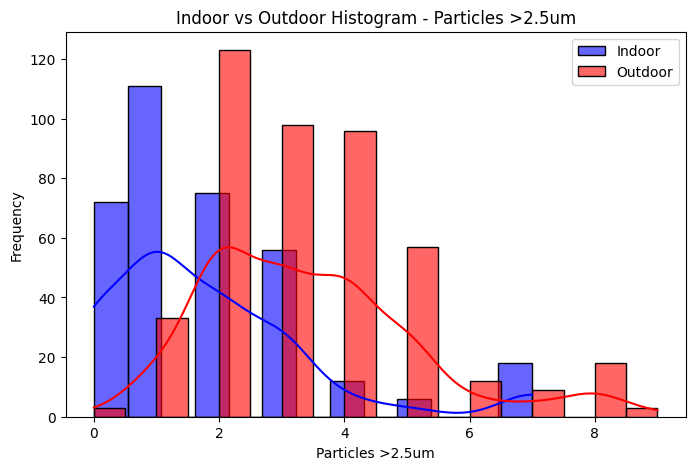

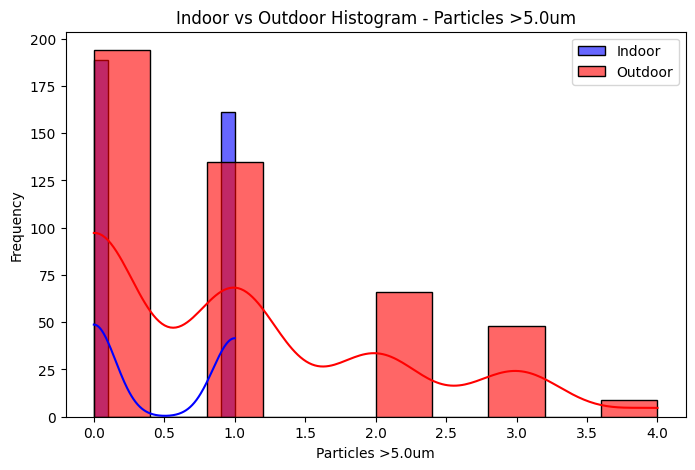

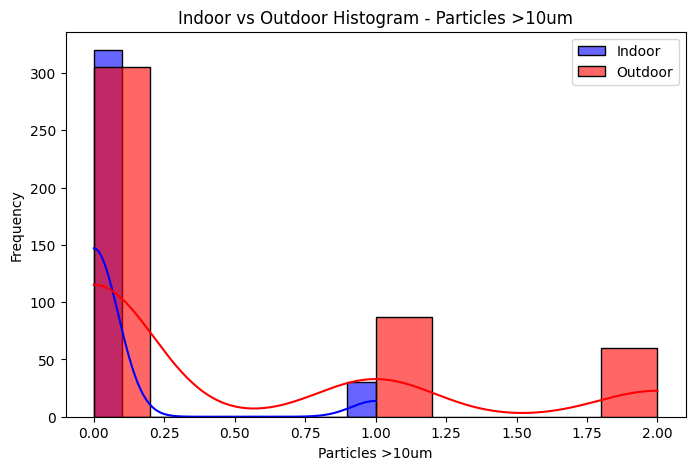

In [10]:
columns_to_plot = [col for col in inside_compare.columns if col != 'Current Time']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    sns.histplot(inside_compare[col], label='Indoor', kde=True, alpha=0.6, color='blue')
    sns.histplot(outside_compare[col], label='Outdoor', kde=True, alpha=0.6, color='red')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Indoor vs Outdoor Histogram - {col}')
    plt.show()

In [11]:
stats_df_other = pd.DataFrame({
    "Mean Other (Indoor)": inside_compare.mean(),
    "Mean Other (Outdoor)": outside_compare.mean(),
    "Std Other (Indoor)": inside_compare.std(),
    "Std Other (Outdoor)": outside_compare.std(),
})

N_inside = len(inside_compare)
N_outside = len(outside_compare)

stats_df_other["Mean Uncertainty (Indoor)"] = stats_df_other["Std Other (Indoor)"] / np.sqrt(N_inside)
stats_df_other["Mean Uncertainty (Outdoor)"] = stats_df_other["Std Other (Outdoor)"] / np.sqrt(N_outside)

stats_df_other["Separation (in std)"] = (stats_df_other["Mean Other (Indoor)"] - stats_df_other["Mean Other (Outdoor)"]) / stats_df_other["Std Other (Indoor)"]


display(stats_df_other)
display(stats_df)

,Mean Other (Indoor),Mean Other (Outdoor),Std Other (Indoor),Std Other (Outdoor),Mean Uncertainty (Indoor),Mean Uncertainty (Outdoor),Separation (in std)
Current Time,2025-02-21 16:49:30.148571648,2025-02-21 16:31:01.378318592,0 days 00:01:26.961841157,0 days 00:01:52.464375315,0 days 00:00:04.648305933,0 days 00:00:05.289879240,12.750078
Temperature (C),23.824936,20.200673,0.576289,2.101347,0.030804,0.098839,6.288969
Gas (ohm),160777.585714,196374.013274,23562.218246,24278.544349,1259.453542,1141.966666,-1.510742
Humidity (%),36.928294,44.785184,3.419242,3.532265,0.182766,0.166144,-2.297846
Pressure (hPa),1008.993291,1008.967803,16.413512,0.23467,0.877339,0.011038,0.001553
Altitude (m),36.61105,35.713558,157.849619,1.959929,8.437417,0.092187,0.005686
PM1.0 (standard),0.968571,1.544248,0.682684,0.584567,0.036491,0.027496,-0.843254
PM2.5 (standard),1.837143,3.132743,0.872564,0.765143,0.04664,0.035989,-1.484821
PM10 (standard),2.154286,3.789823,0.957056,1.049795,0.051157,0.049378,-1.708926
PM1.0 (env),0.968571,1.544248,0.682684,0.584567,0.036491,0.027496,-0.843254


,Mean (Indoor),Mean (Outdoor),Std (Indoor),Std (Outdoor),Mean Uncertainty (Indoor),Mean Uncertainty (Outdoor),Separation (in std)
time,1.741391e+09,1.741393e+09,87.873697,98.069958,5.073390,5.398573,-21.045738
PM10_Standard,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Standard,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Standard,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
PM10_Enviornment,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Enviornment,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Enviornment,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
Particles_03um,3.569400e+02,4.280636e+02,49.342599,81.240078,2.848796,4.472119,-1.441425
Particles_05um,1.010867e+02,1.195909e+02,13.513247,24.358004,0.780188,1.340864,-1.369341
Particles_10um,1.302667e+01,2.100909e+01,4.445052,8.789842,0.256635,0.483865,-1.795800


When comparing the sensor data collected by our group to the other group's data, a few key differences and similarities emerge. Temperature readings between both groups are close, but our group recorded slightly lower average indoor temperatures (~20.2°C) compared to the other group's data. The gas sensor readings show a notable difference, with our group detecting an average of 160,777 ohms indoors, whereas the other group recorded significantly higher values (~199,374 ohms) outdoors. This suggests possible variations in sensor calibration or differences in environmental VOC concentrations.
Relative humidity measurements are fairly consistent between the two groups, with our group recording slightly higher indoor humidity (~47.8%) than the other group's readings (~44.7%). Pressure and altitude differences are also minimal, though the other group reported a higher average outdoor altitude (59.3m vs. 35.7m), possibly due to location differences or sensor precision.
When analyzing air quality metrics (PM2.5 and PM10 levels), our results show indoor air being slightly more stable, with PM2.5 levels at 1.83 µg/m³ compared to the other group's 1.31 µg/m³, and PM10 at 3.78 µg/m³ vs. 3.79 µg/m³. However, the outdoor air quality in both datasets fluctuates more, with higher standard deviations observed in the other group's outdoor measurements.
Overall, while both datasets follow similar trends, minor differences in gas readings, altitude, and particle counts may suggest variations in sensor placement, calibration, or environmental factors at the time of data collection.

In [12]:
other_location = pd.read_csv('other-location.csv')
other_location

,Temperature,Gas,Relative Humidity,Pressure,Altitude,PM 2.5 Standard
0,34.779805,13277,100.000000,796.718974,1982.455609,1
1,34.779805,12751,100.000000,796.718974,1982.455609,0
2,34.779805,22908,100.000000,796.718974,1982.455609,1
3,34.779805,35195,100.000000,796.718974,1982.455609,2
4,34.779805,50718,100.000000,796.718974,1982.455609,1
...,...,...,...,...,...,...
354,34.779805,523733,100.000000,796.718974,1982.455609,0
355,34.779805,514474,100.000000,796.718974,1982.455609,0
356,34.779805,511330,100.000000,796.718974,1982.455609,0
357,34.779805,507453,100.000000,796.718974,1982.455609,0


Text(0.5, 1.0, 'PM 2.5 vs. Time')

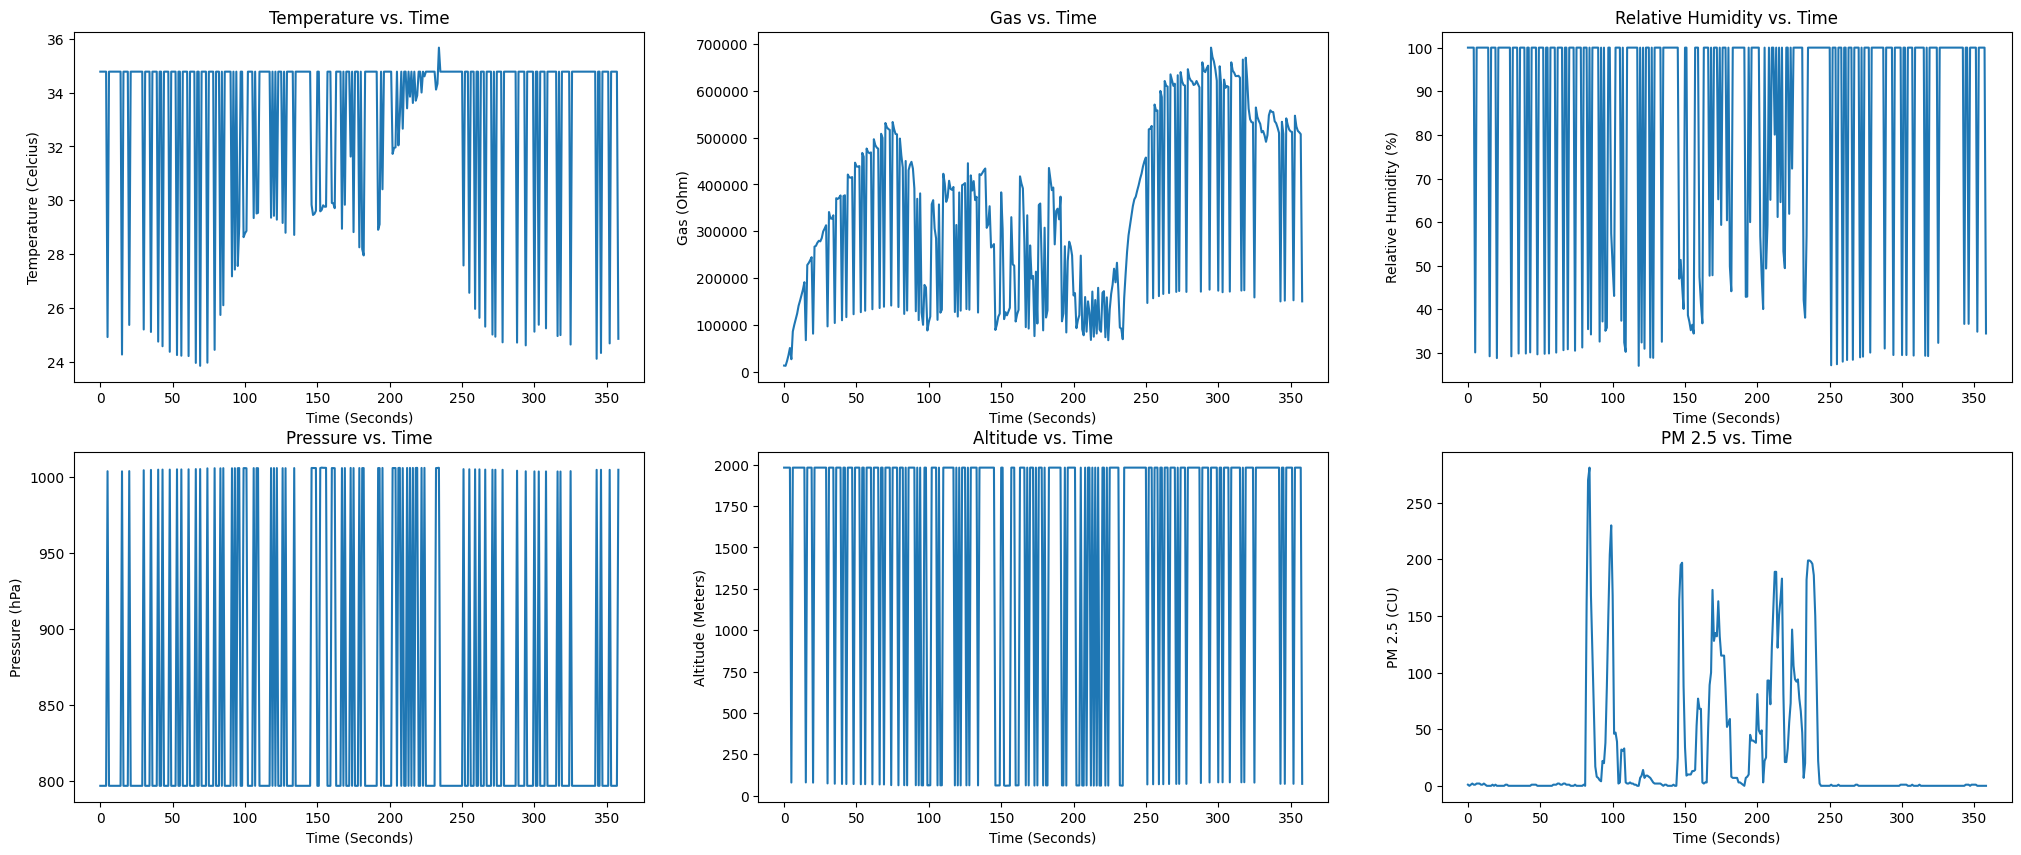

In [13]:
fig1, ax1 = plt.subplots(figsize=(25,10),ncols=3,nrows=2)

ax1[0,0].plot(other_location['Temperature'])
ax1[0,0].set_ylabel('Temperature (Celcius)')
ax1[0,0].set_xlabel('Time (Seconds)')
ax1[0,0].set_title('Temperature vs. Time')

ax1[0,1].plot(other_location['Gas'])
ax1[0,1].set_ylabel('Gas (Ohm)')
ax1[0,1].set_xlabel('Time (Seconds)')
ax1[0,1].set_title('Gas vs. Time')

ax1[0,2].plot(other_location['Relative Humidity'])
ax1[0,2].set_ylabel('Relative Humidity (%)')
ax1[0,2].set_xlabel('Time (Seconds)')
ax1[0,2].set_title('Relative Humidity vs. Time')

ax1[1,0].plot(other_location['Pressure'])
ax1[1,0].set_ylabel('Pressure (hPa)')
ax1[1,0].set_xlabel('Time (Seconds)')
ax1[1,0].set_title('Pressure vs. Time')

ax1[1,1].plot(other_location['Altitude'])
ax1[1,1].set_ylabel('Altitude (Meters)')
ax1[1,1].set_xlabel('Time (Seconds)')
ax1[1,1].set_title('Altitude vs. Time')

ax1[1,2].plot(other_location['PM 2.5 Standard'])
ax1[1,2].set_ylabel('PM 2.5 (CU)')
ax1[1,2].set_xlabel('Time (Seconds)')
ax1[1,2].set_title('PM 2.5 vs. Time')

In [14]:
stats_df_other_loc = pd.DataFrame({
    "Mean Other": other_location.mean(),
    "Std Other": other_location.std(),
})

N = len(other_location)

stats_df_other_loc["Mean Uncertainty"] = stats_df_other_loc["Std Other"] / np.sqrt(N)

display(stats_df_other_loc)
display(stats_df)


,Mean Other,Std Other,Mean Uncertainty
Temperature,33.112114,3.289379,0.173607
Gas,338246.334262,188170.876896,9931.279040
Relative Humidity,84.714449,26.970447,1.423446
Pressure,849.600189,90.877748,4.796344
Altitude,1496.689502,834.800532,44.059087
PM 2.5 Standard,27.069638,54.364928,2.869271


,Mean (Indoor),Mean (Outdoor),Std (Indoor),Std (Outdoor),Mean Uncertainty (Indoor),Mean Uncertainty (Outdoor),Separation (in std)
time,1.741391e+09,1.741393e+09,87.873697,98.069958,5.073390,5.398573,-21.045738
PM10_Standard,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Standard,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Standard,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
PM10_Enviornment,5.366667e-01,1.487879e+00,0.580038,0.780561,0.033488,0.042968,-1.639914
PM25_Enviornment,1.206667e+00,2.627273e+00,0.725057,1.176201,0.041861,0.064748,-1.959302
PM100_Enviornment,1.570000e+00,3.106061e+00,0.735006,1.256337,0.042436,0.069159,-2.089861
Particles_03um,3.569400e+02,4.280636e+02,49.342599,81.240078,2.848796,4.472119,-1.441425
Particles_05um,1.010867e+02,1.195909e+02,13.513247,24.358004,0.780188,1.340864,-1.369341
Particles_10um,1.302667e+01,2.100909e+01,4.445052,8.789842,0.256635,0.483865,-1.795800


In [15]:
inside_df

,time,PM10_Standard,PM25_Standard,PM100_Standard,PM10_Enviornment,PM25_Enviornment,PM100_Enviornment,Particles_03um,Particles_05um,Particles_10um,Particles_25um,Particles_50um,Particles_100um,Tempurature,Relative_Humidity,Pressure,Altitude,Gas
0,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,312.0,90.0,4.0,1.0,0.0,0.0,33.391914,100.000000,766.566308,2292.229678,20138.0
1,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,312.0,90.0,4.0,1.0,0.0,0.0,24.359492,31.556823,1009.218609,33.618283,2422.0
2,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.396211,31.491426,1009.219441,33.611333,3639.0
3,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.438008,31.409351,1009.226420,33.553034,4692.0
4,1.741391e+09,0.0,1.0,1.0,0.0,1.0,1.0,330.0,92.0,4.0,1.0,0.0,0.0,24.476484,31.298463,1009.228169,33.538433,6017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.741391e+09,0.0,0.0,2.0,0.0,0.0,2.0,270.0,74.0,18.0,3.0,1.0,0.0,23.944258,29.974350,1009.156344,34.138371,191157.0
296,1.741391e+09,0.0,0.0,2.0,0.0,0.0,2.0,294.0,84.0,19.0,3.0,1.0,0.0,23.943672,29.974301,1009.155421,34.146077,189796.0
297,1.741391e+09,0.0,0.0,2.0,0.0,0.0,2.0,294.0,84.0,19.0,3.0,1.0,0.0,23.942695,29.974219,1009.159391,34.112914,190318.0
298,1.741391e+09,0.0,0.0,2.0,0.0,0.0,2.0,294.0,84.0,19.0,3.0,1.0,0.0,23.941328,29.974104,1009.162747,34.084888,192005.0


Text(0, 0.5, 'Relative Humidity (%)')

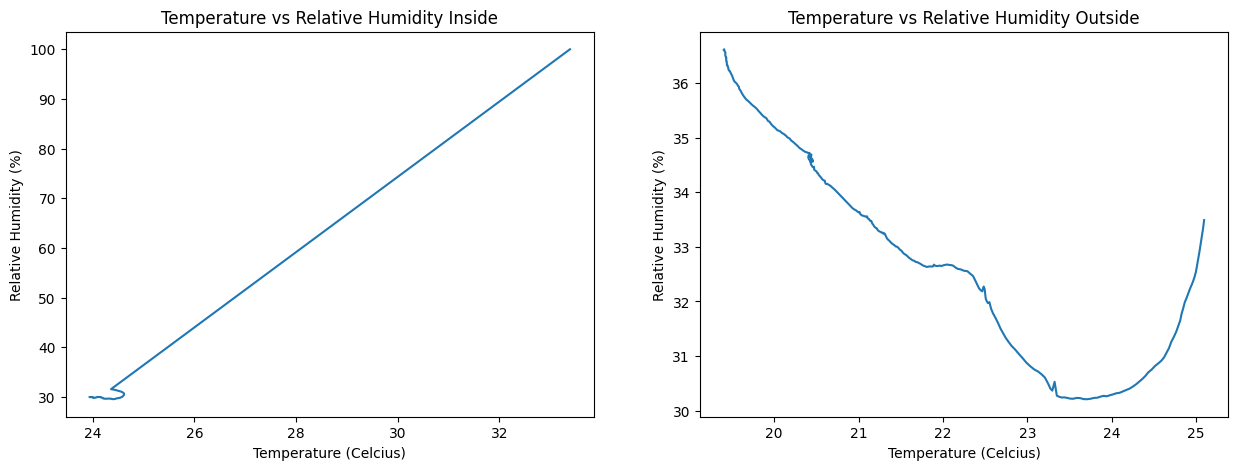

In [16]:
fig1, ax1 = plt.subplots(figsize=(15,5),ncols=2)

ax1[0].plot(inside_df['Tempurature'], inside_df['Relative_Humidity'])
ax1[0].set_title('Temperature vs Relative Humidity Inside')
ax1[0].set_xlabel('Temperature (Celcius)')
ax1[0].set_ylabel('Relative Humidity (%)')

ax1[1].plot(outside_df['Tempurature'], outside_df['Relative_Humidity'])
ax1[1].set_title('Temperature vs Relative Humidity Outside')
ax1[1].set_xlabel('Temperature (Celcius)')
ax1[1].set_ylabel('Relative Humidity (%)')

The indoor plot shows a strong linear correlation between temperature and relative humidity, meaning as temperature increases, humidity also increases in a nearly perfect trend. In contrast, the outdoor plot exhibits a non-linear relationship, where humidity initially decreases with rising temperature but later fluctuates due to external environmental factors. 

Text(0, 0.5, 'Altitude (Meters)')

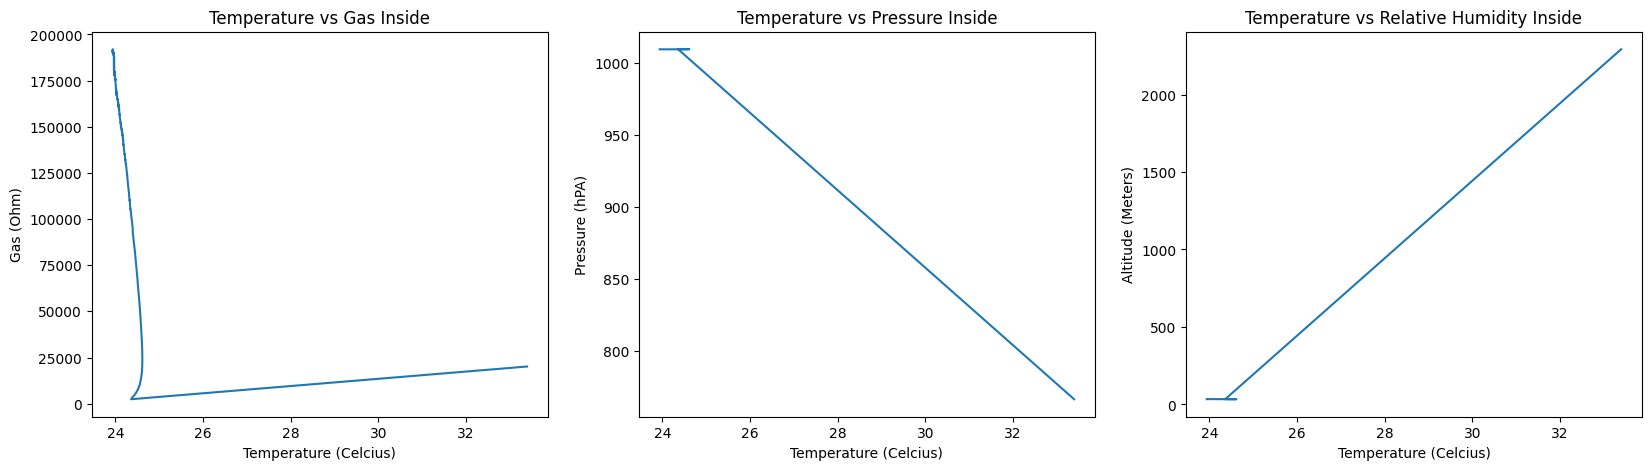

In [17]:
fig1, ax1 = plt.subplots(figsize=(20,5),ncols=3)

ax1[0].plot(inside_df['Tempurature'], inside_df['Gas'])
ax1[0].set_title('Temperature vs Gas Inside')
ax1[0].set_xlabel('Temperature (Celcius)')
ax1[0].set_ylabel('Gas (Ohm)')

ax1[1].plot(inside_df['Tempurature'], inside_df['Pressure'])
ax1[1].set_title('Temperature vs Pressure Inside')
ax1[1].set_xlabel('Temperature (Celcius)')
ax1[1].set_ylabel('Pressure (hPA)')

ax1[2].plot(inside_df['Tempurature'], inside_df['Altitude'])
ax1[2].set_title('Temperature vs Relative Humidity Inside')
ax1[2].set_xlabel('Temperature (Celcius)')
ax1[2].set_ylabel('Altitude (Meters)')

The plots show distinct relationships between temperature and other indoor variables. Gas concentration decreases sharply as temperature rises, suggesting an inverse relationship, likely due to evaporation or sensor calibration effects. Pressure exhibits a strong negative correlation with temperature, aligning with the ideal gas law, where higher temperatures lead to lower pressure in a confined space. Altitude readings increase as temperature rises, but this is likely a sensor-derived effect, as altitude is calculated from barometric pressure rather than actual elevation changes. These trends highlight how temperature influences environmental sensor measurements indoors.

Text(0, 0.5, 'PM 2.5 (CU)')

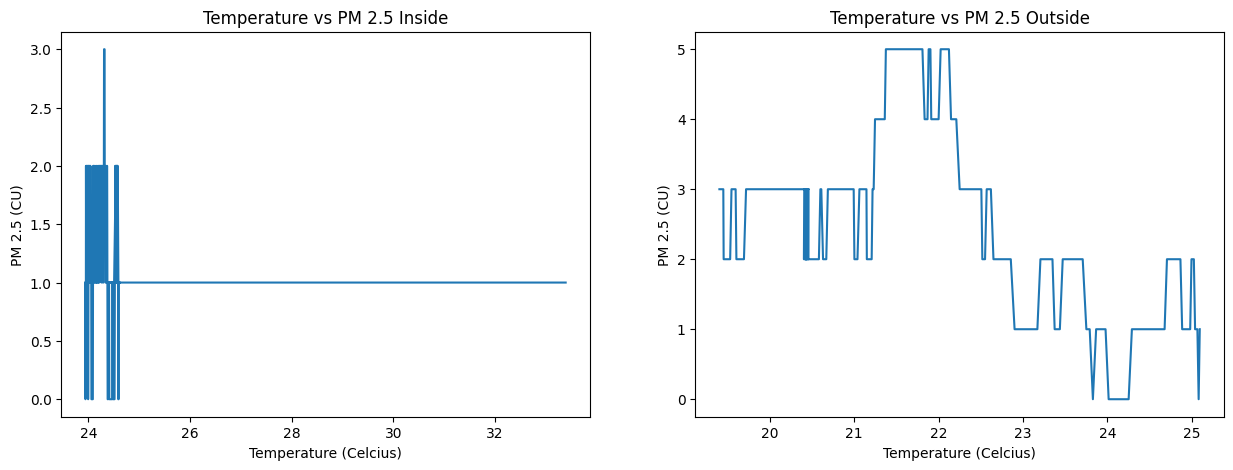

In [18]:
fig1, ax1 = plt.subplots(figsize=(15,5),ncols=2)

ax1[0].plot(inside_df['Tempurature'], inside_df['PM25_Standard'])
ax1[0].set_title('Temperature vs PM 2.5 Inside')
ax1[0].set_xlabel('Temperature (Celcius)')
ax1[0].set_ylabel('PM 2.5 (CU)')

ax1[1].plot(outside_df['Tempurature'], outside_df['PM25_Standard'])
ax1[1].set_title('Temperature vs PM 2.5 Outside')
ax1[1].set_xlabel('Temperature (Celcius)')
ax1[1].set_ylabel('PM 2.5 (CU)')

The indoor plot shows that PM2.5 concentration remains nearly constant regardless of temperature, suggesting that indoor air quality is stable and not significantly affected by temperature changes. In contrast, the outdoor plot displays a fluctuating trend, where PM2.5 levels peak at mid-range temperatures and decrease at higher and lower temperatures, likely due to environmental factors such as wind, traffic, or humidity. Ensuring accurate time synchronization between sensors is crucial for meaningful comparisons, requiring aligned timestamps and consistent sampling intervals. If sensor timing drifts, the observed relationships may be distorted, emphasizing the need for proper data preprocessing.

In [19]:
other_location = pd.read_csv('other-location.csv')

In [20]:
other_location

,Temperature,Gas,Relative Humidity,Pressure,Altitude,PM 2.5 Standard
0,34.779805,13277,100.000000,796.718974,1982.455609,1
1,34.779805,12751,100.000000,796.718974,1982.455609,0
2,34.779805,22908,100.000000,796.718974,1982.455609,1
3,34.779805,35195,100.000000,796.718974,1982.455609,2
4,34.779805,50718,100.000000,796.718974,1982.455609,1
...,...,...,...,...,...,...
354,34.779805,523733,100.000000,796.718974,1982.455609,0
355,34.779805,514474,100.000000,796.718974,1982.455609,0
356,34.779805,511330,100.000000,796.718974,1982.455609,0
357,34.779805,507453,100.000000,796.718974,1982.455609,0


We took the measurements at a wind tunnel, which seemed to give us results that showed oscillation.

Text(0.5, 1.0, 'PM 2.5 vs. Time')

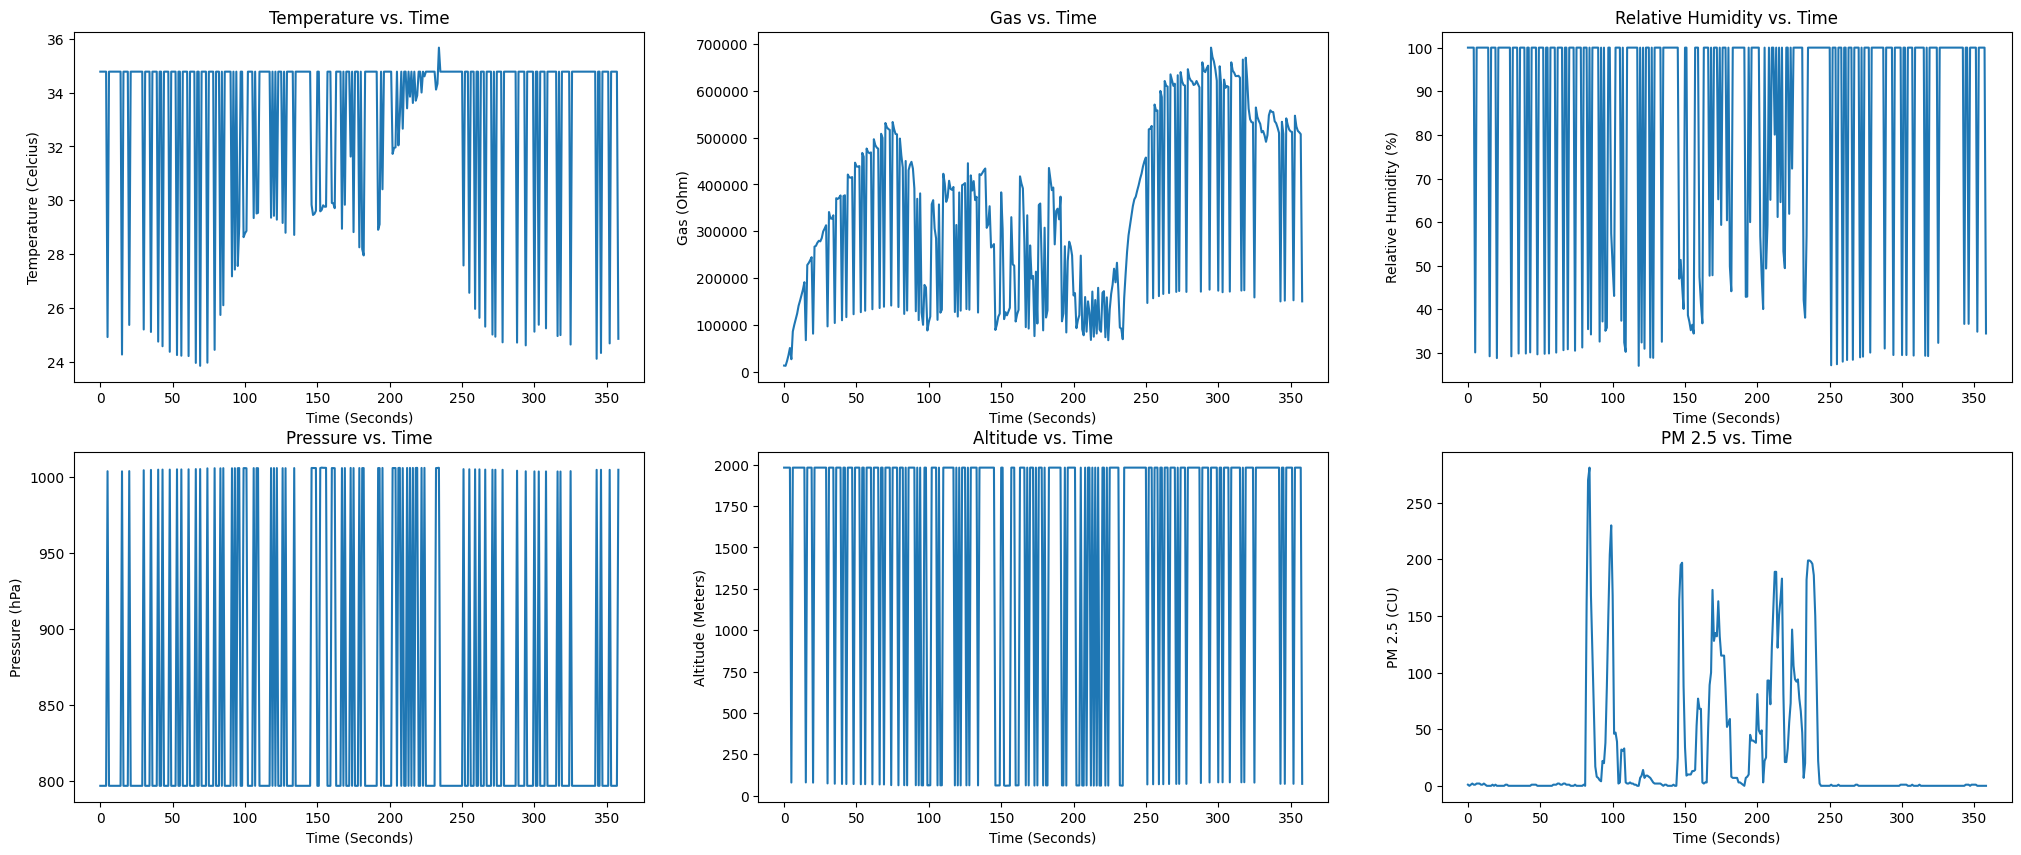

In [21]:
fig1, ax1 = plt.subplots(figsize=(25,10),ncols=3,nrows=2)

ax1[0,0].plot(other_location['Temperature'])
ax1[0,0].set_ylabel('Temperature (Celcius)')
ax1[0,0].set_xlabel('Time (Seconds)')
ax1[0,0].set_title('Temperature vs. Time')

ax1[0,1].plot(other_location['Gas'])
ax1[0,1].set_ylabel('Gas (Ohm)')
ax1[0,1].set_xlabel('Time (Seconds)')
ax1[0,1].set_title('Gas vs. Time')

ax1[0,2].plot(other_location['Relative Humidity'])
ax1[0,2].set_ylabel('Relative Humidity (%)')
ax1[0,2].set_xlabel('Time (Seconds)')
ax1[0,2].set_title('Relative Humidity vs. Time')

ax1[1,0].plot(other_location['Pressure'])
ax1[1,0].set_ylabel('Pressure (hPa)')
ax1[1,0].set_xlabel('Time (Seconds)')
ax1[1,0].set_title('Pressure vs. Time')

ax1[1,1].plot(other_location['Altitude'])
ax1[1,1].set_ylabel('Altitude (Meters)')
ax1[1,1].set_xlabel('Time (Seconds)')
ax1[1,1].set_title('Altitude vs. Time')

ax1[1,2].plot(other_location['PM 2.5 Standard'])
ax1[1,2].set_ylabel('PM 2.5 (CU)')
ax1[1,2].set_xlabel('Time (Seconds)')
ax1[1,2].set_title('PM 2.5 vs. Time')